## Loan Delinquency Prediction

Loan default prediction is one of the most critical and crucial problem faced by financial institutions and organizations as it has a noteworthy effect on the profitability of these institutions. In recent years, there is a tremendous increase in the volume of non – performing loans which results in a jeopardizing effect on the growth of these institutions.
 
Therefore, to maintain a healthy portfolio, the banks put stringent monitoring and evaluation measures in place to ensure timely repayment of loans by borrowers. Despite these measures, a major proportion of loans become delinquent. Delinquency occurs when a borrower misses a payment against his/her loan.
 
Given the information like mortgage details, borrowers related details and payment details, our objective is to identify the delinquency status of loans for the next month given the delinquency status for the previous 12 months (in number of months)


In [2]:
# to handle datasets
import pandas as pd
import numpy as np

# for text / string processing
import re

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

# Oversampling functions for handling imbalance datasets
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import (SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC,
                                    KMeansSMOTE)
from imblearn.over_sampling import RandomOverSampler
from imblearn.base import BaseSampler



# feature scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# for tree binarisation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# to build the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# to evaluate the models
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,make_scorer
from sklearn.model_selection import GridSearchCV

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load Training dataset
train_data = pd.read_csv('train.csv')
train_data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [4]:
# load Test dataset
test_data = pd.read_csv('test.csv')
test_data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0


###  Exploratory Data Analysis
For the Training Data :
- Identify the Feature Columns and Target Columns
- check if the target class  distribution is imbalanced
- check Features for categories and data types
- check Features for missing values and outliers
- check Features for data distribution

For the Test Data:
- check if test data feature columns are identical to training data

#### Check for categories of features (Columns)  and their data types

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

#### Check for imbalance in Target Class distribution

In [6]:
train_data['m13'].value_counts(normalize=True) # m13 is the Target column

0    0.99452
1    0.00548
Name: m13, dtype: float64

- The Target Class is highly imbalanced with just 0.548% values for Positive

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35866 entries, 0 to 35865
Data columns (total 28 columns):
loan_id                     35866 non-null int64
source                      35866 non-null object
financial_institution       35866 non-null object
interest_rate               35866 non-null float64
unpaid_principal_bal        35866 non-null int64
loan_term                   35866 non-null int64
origination_date            35866 non-null object
first_payment_date          35866 non-null object
loan_to_value               35866 non-null int64
number_of_borrowers         35866 non-null int64
debt_to_income_ratio        35866 non-null int64
borrower_credit_score       35866 non-null int64
loan_purpose                35866 non-null object
insurance_percent           35866 non-null int64
co-borrower_credit_score    35866 non-null int64
insurance_type              35866 non-null int64
m1                          35866 non-null int64
m2                          35866 non-null int64
m3

- Checking if identical columns exist in train and test data - the only difference should be absence of target variable m13 in test data

In [8]:
no_col_match = [col for col in train_data.columns if col not in test_data.columns]
print(no_col_match) # should print only the target column

no_dtype_match = [col for col in test_data.columns if test_data[col].dtype != train_data[col].dtype]
print(no_dtype_match)

for col in test_data.columns:
    if test_data[col].dtype != train_data[col].dtype:
        print('{} Train Dtype: {} Test Dtype: {}'.format(col,train_data[col].dtype,test_data[col].dtype))
    


['m13']
['number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type']
number_of_borrowers Train Dtype: float64 Test Dtype: int64
debt_to_income_ratio Train Dtype: float64 Test Dtype: int64
borrower_credit_score Train Dtype: float64 Test Dtype: int64
insurance_percent Train Dtype: float64 Test Dtype: int64
co-borrower_credit_score Train Dtype: float64 Test Dtype: int64
insurance_type Train Dtype: float64 Test Dtype: int64


In [9]:
train_data[no_dtype_match].sample(5)

,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type
54995,1.0,21.0,778.0,0.0,0.0,0.0
45618,1.0,24.0,771.0,30.0,0.0,0.0
19315,1.0,23.0,808.0,0.0,0.0,0.0
71893,1.0,25.0,760.0,0.0,0.0,0.0
49421,2.0,22.0,764.0,0.0,785.0,0.0


In [10]:
# For the numerical columns with mismatching data types between test and train - see if the data in floating type is a whole number
for col in no_dtype_match:
    print(all(val.is_integer() for val in train_data[col])) # if the data is a whole number (integer)then print True

True
True
True
True
True
True


In [11]:
# We can convert floating data types in to integer
train_data[no_dtype_match]= train_data[no_dtype_match].astype('int64')

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null int64
debt_to_income_ratio        116058 non-null int64
borrower_credit_score       116058 non-null int64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null int64
co-borrower_credit_score    116058 non-null int64
insurance_type              116058 non-null int64
m1                          116058 non-null int64
m2                          1160

In [13]:
# check if data types match now
no_dtype_match = [col for col in test_data.columns if test_data[col].dtype != train_data[col].dtype]
print(no_dtype_match)

[]


In [14]:
# find categorical features
cat_features = [col for col in train_data.columns if train_data[col].dtype=='object']
print('There are {} categorical features'.format(len(cat_features)))
print(cat_features)

There are 5 categorical features
['source', 'financial_institution', 'origination_date', 'first_payment_date', 'loan_purpose']


In [15]:
# find numerical features
num_features = [col for col in train_data.columns if train_data[col].dtype!='object']
print('There are {} Numerical features'.format(len(num_features)))
print(num_features)

There are 24 Numerical features
['loan_id', 'interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13']


In [16]:
train_data[cat_features].sample(10)

,source,financial_institution,origination_date,first_payment_date,loan_purpose
110427,Z,OTHER,2012-01-01,03/2012,A23
100889,X,OTHER,2012-02-01,04/2012,A23
22971,Z,Browning-Hart,2012-02-01,04/2012,C86
19871,X,Browning-Hart,2012-01-01,03/2012,A23
52536,Z,OTHER,2012-03-01,05/2012,C86
23253,X,"Taylor, Hunt and Rodriguez",2012-02-01,03/2012,A23
56218,X,"Romero, Woods and Johnson",2012-02-01,04/2012,B12
114003,Z,Browning-Hart,2012-02-01,05/2012,A23
79384,X,Browning-Hart,2012-01-01,03/2012,C86
73117,Y,Browning-Hart,2012-01-01,04/2012,A23


####  Temporal Features (Date time based) columns
We have 2 features (columns) - 'origination_date' and 'first_payment_date'. While the dates may not be as useful - 
the elapsed days between Origination date and first payment date may be useful.

-TBD : Feature Engineering section

In [17]:
# let's see the range of values present in the categorical features
for col in cat_features:
    print(col, ' values: ', train_data[col].unique())

source  values:  ['Z' 'Y' 'X']
financial_institution  values:  ['Turner, Baldwin and Rhodes' 'Swanson, Newton and Miller'
 'Thornton-Davis' 'OTHER' 'Browning-Hart' 'Richardson Ltd'
 'Edwards-Hoffman' 'Richards-Walters' 'Martinez, Duffy and Bird'
 'Miller, Mcclure and Allen' 'Anderson-Taylor'
 'Taylor, Hunt and Rodriguez' 'Nicholson Group' 'Cole, Brooks and Vincent'
 'Sanchez, Hays and Wilkerson' 'Sanchez-Robinson' 'Suarez Inc'
 'Romero, Woods and Johnson' 'Chapman-Mcmahon']
origination_date  values:  ['2012-03-01' '2012-01-01' '2012-02-01']
first_payment_date  values:  ['05/2012' '03/2012' '04/2012' '02/2012']
loan_purpose  values:  ['C86' 'B12' 'A23']


- Cardinality is low - no need to address

In [18]:
train_data.financial_institution.value_counts(normalize=True)

OTHER                          0.428226
Browning-Hart                  0.274449
Swanson, Newton and Miller     0.059229
Edwards-Hoffman                0.041850
Martinez, Duffy and Bird       0.040626
Miller, Mcclure and Allen      0.027211
Nicholson Group                0.018232
Turner, Baldwin and Rhodes     0.015906
Suarez Inc                     0.015423
Cole, Brooks and Vincent       0.014148
Richards-Walters               0.012571
Taylor, Hunt and Rodriguez     0.010848
Sanchez-Robinson               0.010279
Sanchez, Hays and Wilkerson    0.007350
Romero, Woods and Johnson      0.006462
Thornton-Davis                 0.005609
Anderson-Taylor                0.004162
Richardson Ltd                 0.004076
Chapman-Mcmahon                0.003343
Name: financial_institution, dtype: float64

In [19]:
train_data[num_features].sample(10)

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
85496,961988513952,4.125,151000,360,80,1,45,701,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
85497,852946222188,3.250,94000,154,58,2,25,788,0,790,0,0,0,0,0,0,0,0,0,0,0,0,0,0
87193,572950278674,4.500,128000,360,95,1,40,717,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89803,741994423716,4.125,417000,360,78,2,28,712,0,755,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70772,850597992374,4.000,315000,360,41,2,21,695,0,783,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7954,141868294734,4.000,291000,360,57,2,19,782,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30777,559752393776,3.250,208000,180,55,1,36,788,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3577,680270187938,3.100,204000,180,49,2,23,816,0,814,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4377,670220137928,4.000,115000,240,80,2,25,789,0,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30246,134789663201,3.500,417000,180,79,1,25,722,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# let's see the range of values the values in the numerical features - Exclude Loan id
for col in num_features:
    if col != 'loan_id': # loan id is not going to add any information
        print(col, ' values: ', train_data[col].unique())

interest_rate  values:  [4.25  4.875 3.25  4.75  4.375 4.    4.5   4.125 3.75  4.625 5.125 3.375
 3.99  4.312 3.875 5.5   3.5   3.33  5.    3.625 5.25  2.875 3.46  3.98
 3.928 5.375 3.95  4.05  3.125 3.    5.75  3.74  3.709 4.3   4.99  4.225
 5.875 4.28  4.58  4.9   4.49  4.1   3.856 4.54  3.77  3.504 3.958 4.06
 3.87  3.1   3.94  4.124 4.015 2.95  3.167 3.835 3.938 3.503 3.438 3.49
 3.24  4.19  3.902 4.46  3.289 3.978 4.03  4.358 2.99  3.795 3.074 3.91
 2.975 3.71  2.75  4.08  4.876 3.185 3.35  4.2   4.864 3.613 3.865 4.917
 3.908 3.337 3.92  2.625 3.43  3.65  4.17  3.85  3.985 2.775 3.79  3.67
 3.947 4.048 2.8   3.17  4.21  4.849 3.83  4.521 3.852 3.943 3.999 3.972
 3.18  3.476 4.986 3.42  3.2   4.119 5.625 3.175 3.41  3.145 3.837 3.331
 3.7   3.983 4.115 4.499 3.16  3.45  3.319 3.93  3.8   3.925 3.73  4.368
 3.13  3.9   3.05  3.54  3.08  4.29  3.58  3.81  3.31  4.089 3.97  3.746
 4.217 3.825 3.4   3.392 3.321 3.976 3.47  4.33  3.184 4.09  4.31  3.847
 3.923 3.15  3.426 4.012 3.84  3

In [21]:
# let's list the discrete numerical variables and their range of values
discrete = []

for col in num_features:
    if len(train_data[col].unique())<20 and col != 'loan_id' and col!='m13':
        print(col, ' values: ', train_data[col].unique())
        discrete.append(col)
print()
print('There are {} discrete variables'.format(len(discrete)))

number_of_borrowers  values:  [1 2]
insurance_percent  values:  [30  0 25  6 12 35 22 16 18 15 17 40 20 39]
insurance_type  values:  [0 1]
m1  values:  [0 1 2 3]
m2  values:  [0 1 2 3 4]
m3  values:  [0 2 1 3 4 5]
m4  values:  [0 3 1 2 4 5 6]
m5  values:  [0 4 1 3 2 5 6 7]
m6  values:  [0 5 1 2 4 3 6 7 8]
m7  values:  [1 0 6 3 5 2 4 7 8 9]
m8  values:  [ 0  7  1  4  6  2  5  3  9 10]
m9  values:  [ 0  1  8  5  7  3  6  2 10  4 11]
m10  values:  [ 0  1  9  2  6  8  4  3  7 11  5 12]
m11  values:  [ 0  1 10  2  7  9  5  3  8  4  6 11 13]
m12  values:  [ 0  1 11  2  8  3 10  6  9  5  4  7 14]

There are 15 discrete variables


In [22]:
# let's list the continuous numerical variables 
continuous = []

for col in num_features:
    if col not in discrete and col != 'loan_id' and col!='m13':
        print(col)
        continuous.append(col)
print()
print('There are {} continuous variables'.format(len(continuous)))

interest_rate
unpaid_principal_bal
loan_term
loan_to_value
debt_to_income_ratio
borrower_credit_score
co-borrower_credit_score

There are 7 continuous variables


#### Training Dataset - summary of Features:

- 3 Categorical features: 'source', 'financial_institution', 'loan_purpose' 
- 2 Temporal features (TBD - to be converted) : 'origination_date', 'first_payment_date'
- 24 Numerical features: 15 discrete, 7 continuous, 1 Id, and 1 binary target('m13')

#### Check for Missing Values

#####  There are No Missing Values !!!!!
- we have checked train_data.info() & train_data.info() - they don't contain null values

#### Check for Outlier Values
##### 1. Outliers in Continous Numerical  Features

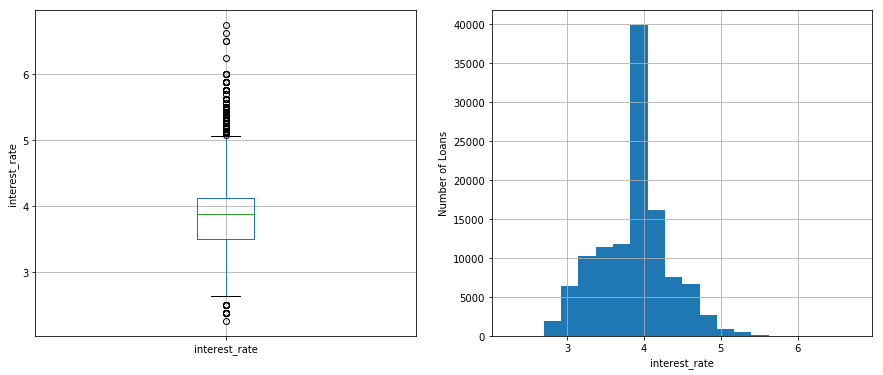

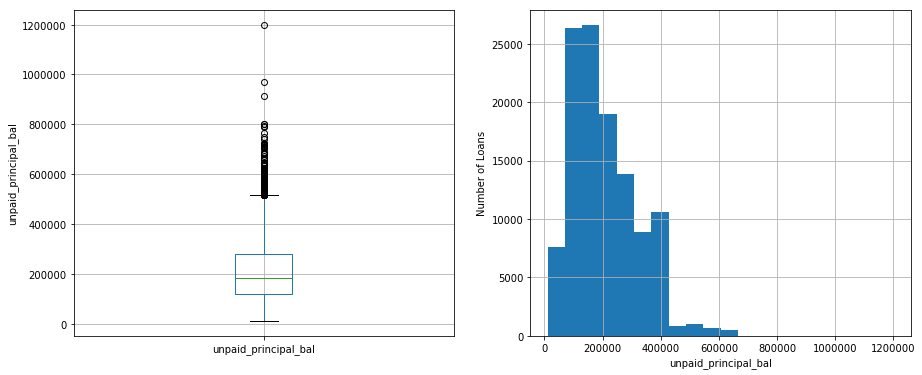

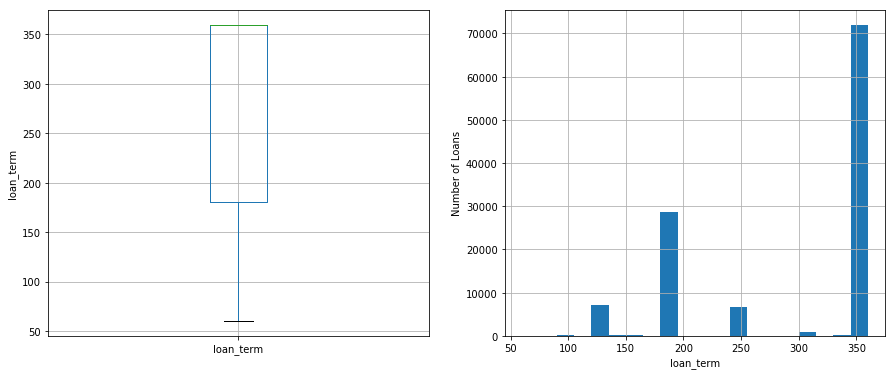

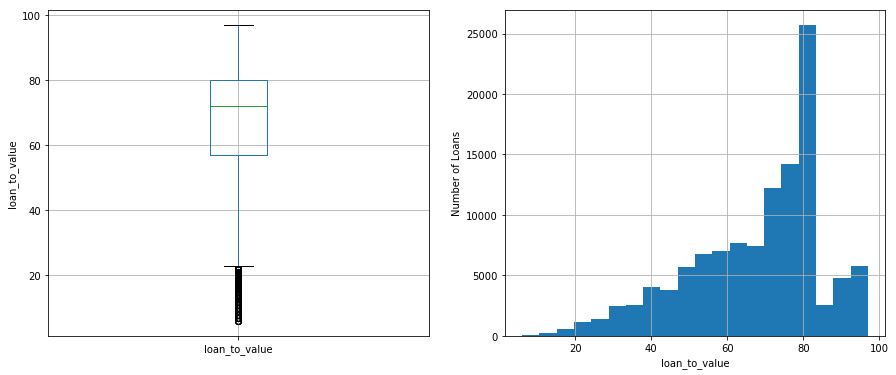

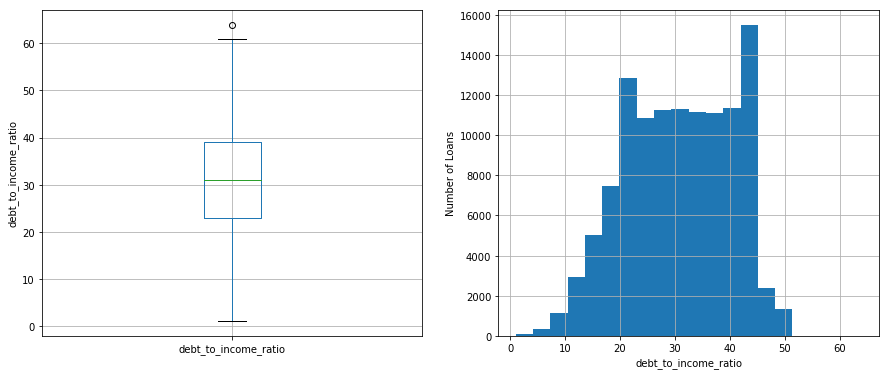

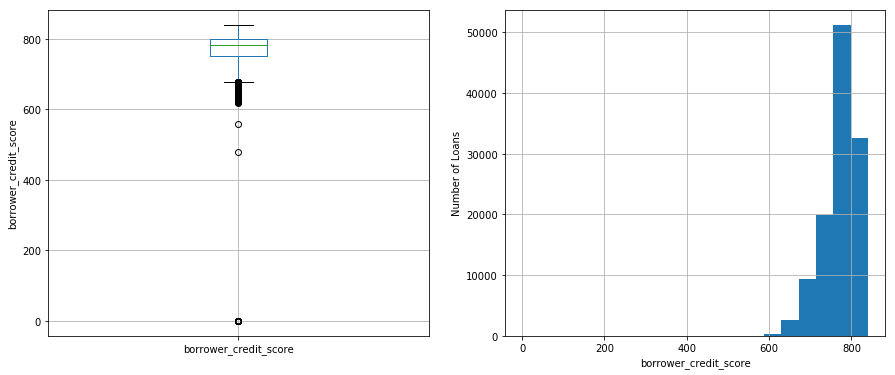

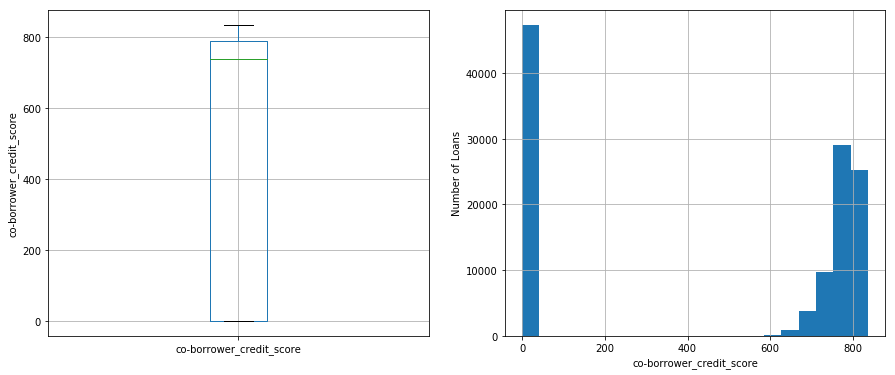

In [23]:
# let's make boxplots to visualise outliers in the continuous features 
# and histograms to get an idea of the distribution

for col in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = train_data.boxplot(column=col)
    fig.set_title('')
    fig.set_ylabel(col)
    
    plt.subplot(1, 2, 2)
    fig = train_data[col].hist(bins=20)
    fig.set_ylabel('Number of Loans')
    fig.set_xlabel(col)

    plt.show()

In [24]:
train_data[continuous].describe()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,borrower_credit_score,co-borrower_credit_score
count,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,3.868961,2.082262e+05,292.280997,67.431939,30.742293,769.926778,459.611565
std,0.461020,1.146851e+05,89.762415,17.291719,9.730798,42.210706,381.946926
min,2.250000,1.100000e+04,60.000000,6.000000,1.000000,0.000000,0.000000
25%,3.500000,1.200000e+05,180.000000,57.000000,23.000000,751.000000,0.000000
50%,3.875000,1.830000e+05,360.000000,72.000000,31.000000,782.000000,740.000000
75%,4.125000,2.780000e+05,360.000000,80.000000,39.000000,800.000000,791.000000
max,6.750000,1.200000e+06,360.000000,97.000000,64.000000,840.000000,836.000000


#### Observations:
- None of the continous features seem to have a normal distribution.
- Most features seem to have outliers
- Need to re-engineer 'co-borrower_credit_score' column -skewed due to account for high count of '0' score in case of 1 borrower

#### Outliers in  Discrete Numerical features

Let's identify the outliers in discrete numerical features . Typically we call outliers only those values that are present in less than 1% of the Loans. However we need to be careful since this is a highly imbalanced data set and we do not want to rule out any point as outliers so easily.This is exactly the same as finding rare labels in categorical features. Discrete numerical features, in essence can be pre-processed / engineered as if they were categorical.

In [25]:
for col in discrete:
    print(train_data[col].value_counts(normalize=True)) #/ np.float(len(data)))
    print()

2    0.593186
1    0.406814
Name: number_of_borrowers, dtype: float64

0     0.882791
30    0.044056
25    0.042091
12    0.021481
6     0.006040
35    0.003205
16    0.000155
18    0.000103
20    0.000026
17    0.000017
40    0.000009
39    0.000009
22    0.000009
15    0.000009
Name: insurance_percent, dtype: float64

0    0.996743
1    0.003257
Name: insurance_type, dtype: float64

0    0.997165
1    0.002525
2    0.000258
3    0.000052
Name: m1, dtype: float64

0    0.998156
1    0.001689
2    0.000112
3    0.000026
4    0.000017
Name: m2, dtype: float64

0    0.998363
1    0.001439
2    0.000121
3    0.000034
4    0.000026
5    0.000017
Name: m3, dtype: float64

0    0.998294
1    0.001448
2    0.000138
3    0.000069
4    0.000026
6    0.000017
5    0.000009
Name: m4, dtype: float64

0    0.997363
1    0.002145
2    0.000284
3    0.000103
4    0.000052
5    0.000026
7    0.000017
6    0.000009
Name: m5, dtype: float64

0    0.997648
1    0.001844
2    0.000224
3    0.000138
4    0

***Most of the discrete features show values that are shared by a tiny proportion of loans in the dataset. For linear models, this may not be a problem, but it most likely will be for tree methods.***

#### Number of labels: cardinality

Let's examine our categorical features. First let us determine whether they show high cardinality - a high number of labels.

In [26]:
for col in cat_features:
    print(col, ' contains ', len(train_data[col].unique()), ' labels')

source  contains  3  labels
financial_institution  contains  19  labels
origination_date  contains  3  labels
first_payment_date  contains  4  labels
loan_purpose  contains  3  labels


- In general no categorical feature has a high cardinality - so Cardinality is NOT an issue
- The temporal features 'origination_date' and 'first_payment_date' will have to be reengineered 


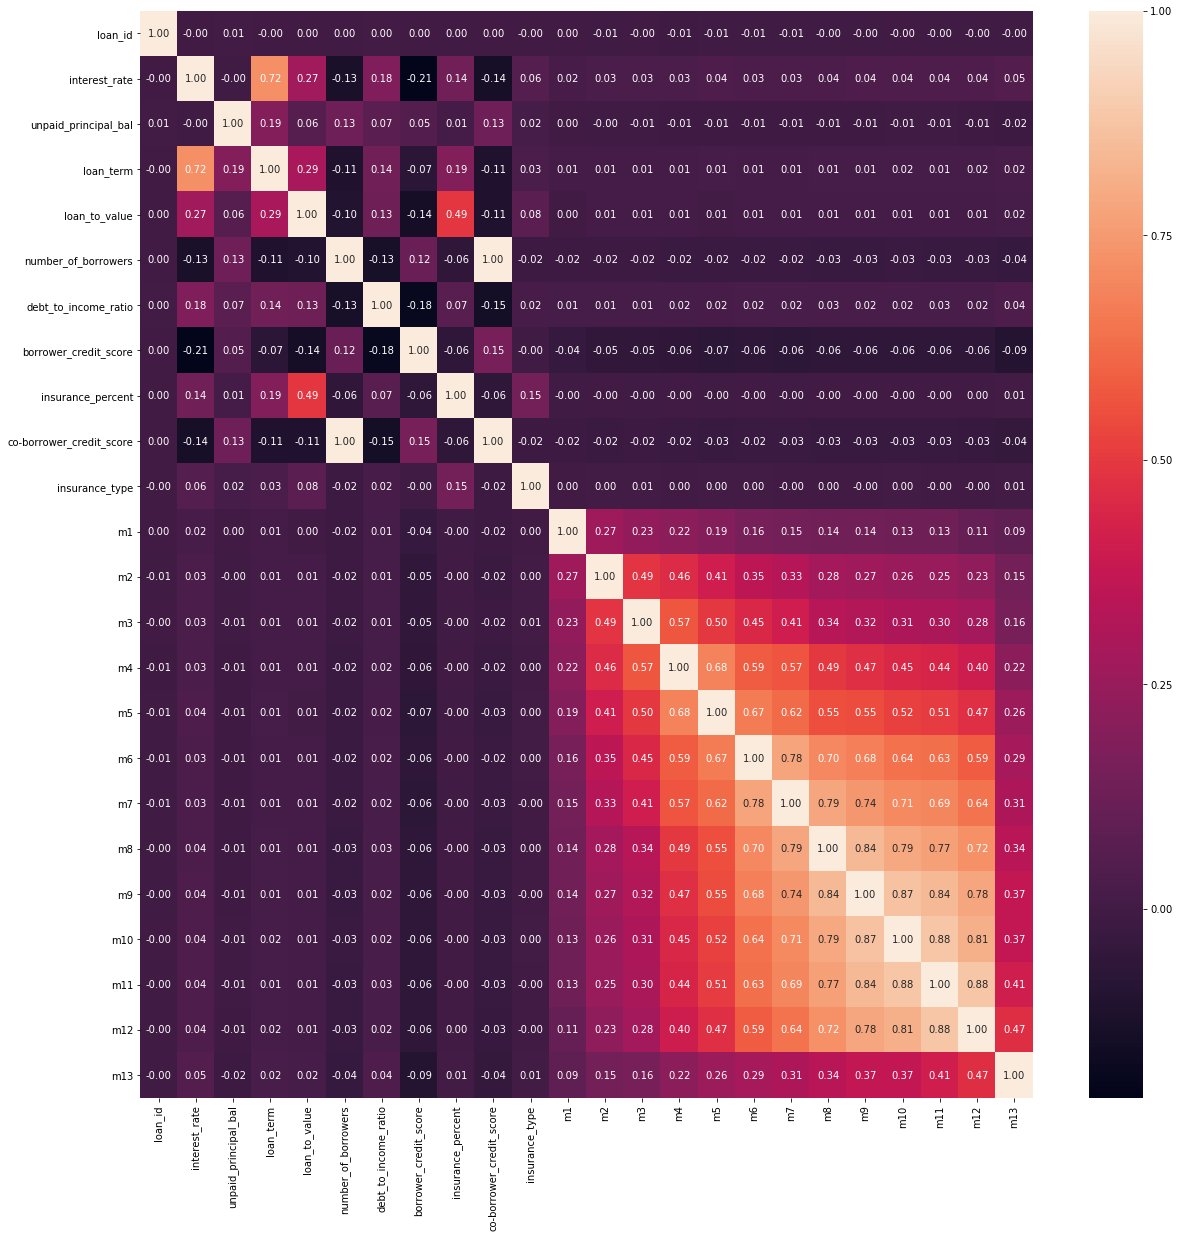

In [27]:
# Assess level of correlation 
data_corr= train_data.corr(method='pearson', min_periods=1)
plt.figure(figsize=(20, 20))
sns.heatmap(data_corr, annot=True, fmt=".2f");



#### Splitting the dataset for training and testing the ML Model
* In order to train our model and see how well it performs, we need to split our data into training and testing sets.
* We can then train our model on the training set, and test how well it has generalised to the data on the test set.
* There are a number of options for how we can split the data, and for what proportion of our original data we set aside for the test set.

In [28]:
Orig_train_data = train_data.copy()# Storing the copy of original training data
Orig_test_data = test_data.copy()
y = train_data['m13'] # Target Variable
X = train_data.drop('m13',axis=1) 

In [29]:
# Because our classes are not absolutely equal in number, we can apply stratification to the split 
# and be sure that the ratio of the classes in both train and validation dataset will be the same 

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=1)

In [30]:
print(X_train.shape,X_valid.shape,test_data.shape)

(87043, 28) (29015, 28) (35866, 28)


### Perform Feature Engineering
First, let's extract information from temporal variables.
#### Temporal variables

- The temporal features 'origination_date' and 'first_payment_date' will be reengineered
- We can convert these to time and date data type and create a new feature 'NOD_fst_pay'
- feature 'NOD_fst_pay' = number of days elapsed between 'origination_date' and 'first_payment_date
- Also we can drop the two features origination_date' and 'first_payment_date from the data set since they don't add value

In [31]:
X_train['orig_date'] = pd.to_datetime(X_train['origination_date'])
X_train['fst_pay_date'] = pd.to_datetime(X_train['first_payment_date'])
X_train['NOD_fst_pay'] = (X_train['fst_pay_date'] - X_train['orig_date']).dt.days # Number of days for first installment payment

In [32]:
X_train.NOD_fst_pay.value_counts()

60    71842
61    10144
91     1605
31     1292
90     1191
29      969
Name: NOD_fst_pay, dtype: int64

In [33]:
# Looking above it makes sense to organize the NOD_fst_pay values in to 3 buckets - 30 , 60 and 90 by considering data 
# in first_payment_date column which has just 4 dates - 1st of Feb,March,April and May 2012

X_train['NOD_fst_pay'].replace(to_replace = 31, value=30, inplace=True)
X_train['NOD_fst_pay'].replace(to_replace = 29, value=30, inplace=True)
X_train['NOD_fst_pay'].replace(to_replace = 61, value=60, inplace=True)
X_train['NOD_fst_pay'].replace(to_replace = 91, value=90, inplace=True)

In [34]:
X_train.NOD_fst_pay.value_counts()

60    81986
90     2796
30     2261
Name: NOD_fst_pay, dtype: int64

In [35]:
# From training set ,Drop features - origination_date, orig_date,first_payment_date and fst_pay_date
X_train.drop(['origination_date','orig_date','first_payment_date','fst_pay_date'], axis=1, inplace=True)

In [36]:
X_train.drop('loan_id',axis=1,inplace=True) # The Loan Id does not help in prediction hence drop it

- Repeat the above steps for Validation and Test dataset

In [37]:
X_valid['orig_date'] = pd.to_datetime(X_valid['origination_date'])
X_valid['fst_pay_date'] = pd.to_datetime(X_valid['first_payment_date'])
X_valid['NOD_fst_pay'] = (X_valid['fst_pay_date'] - X_valid['orig_date']).dt.days # Number of days for first installment payment

In [38]:
# Looking above it makes sense to organize the NOD_fst_pay values in to 3 buckets - 30 , 60 and 90 by considering data 
# in first_payment_date column which has just 4 dates - 1st of Feb,March,April and May 2012

X_valid['NOD_fst_pay'].replace(to_replace = 31, value=30, inplace=True)
X_valid['NOD_fst_pay'].replace(to_replace = 29, value=30, inplace=True)
X_valid['NOD_fst_pay'].replace(to_replace = 61, value=60, inplace=True)
X_valid['NOD_fst_pay'].replace(to_replace = 91, value=90, inplace=True)

In [39]:
X_valid.NOD_fst_pay.value_counts()

60    27338
90      945
30      732
Name: NOD_fst_pay, dtype: int64

In [40]:
# From training set ,Drop features - origination_date, orig_date,first_payment_date and fst_pay_date
X_valid.drop(['origination_date','orig_date','first_payment_date','fst_pay_date'], axis=1, inplace=True)
X_valid.drop('loan_id',axis=1,inplace=True) # The Loan Id does not help in prediction hence drop it

- Now the test_data

In [41]:
test_data['orig_date'] = pd.to_datetime(test_data['origination_date'],dayfirst=True)
test_data['fst_pay_date'] = pd.to_datetime(test_data['first_payment_date'],format='%b-%y')
test_data['NOD_fst_pay'] = (test_data['fst_pay_date'] - test_data['orig_date']).dt.days # Number of days for first installment payment

In [42]:
# Looking above it makes sense to organize the NOD_fst_pay values in to 3 buckets - 30 , 60 and 90 by considering data 
# in first_payment_date column which has just 4 dates - 1st of Feb,March,April and May 2012

test_data['NOD_fst_pay'].replace(to_replace = 31, value=30, inplace=True)
test_data['NOD_fst_pay'].replace(to_replace = 29, value=30, inplace=True)
test_data['NOD_fst_pay'].replace(to_replace = 61, value=60, inplace=True)
test_data['NOD_fst_pay'].replace(to_replace = 91, value=90, inplace=True)

In [43]:
# From training set ,Drop features - origination_date, orig_date,first_payment_date and fst_pay_date
test_data.drop(['origination_date','orig_date','first_payment_date','fst_pay_date'], axis=1, inplace=True)
test_data.drop('loan_id',axis=1,inplace=True) # The Loan Id does not help in prediction hence drop it

In [44]:
# Now process train_data
train_data['orig_date'] = pd.to_datetime(train_data['origination_date'],dayfirst=True)
train_data['fst_pay_date'] = pd.to_datetime(train_data['first_payment_date'])
train_data['NOD_fst_pay'] = (train_data['fst_pay_date'] - train_data['orig_date']).dt.days # Number of days for first installment payment

train_data['NOD_fst_pay'].replace(to_replace = 31, value=30, inplace=True)
train_data['NOD_fst_pay'].replace(to_replace = 29, value=30, inplace=True)
train_data['NOD_fst_pay'].replace(to_replace = 61, value=60, inplace=True)
train_data['NOD_fst_pay'].replace(to_replace = 91, value=90, inplace=True)

train_data.drop(['origination_date','orig_date','first_payment_date','fst_pay_date'], axis=1, inplace=True)
train_data.drop('loan_id',axis=1,inplace=True) # The Loan Id does not help in prediction hence drop it

In [45]:
print(len(test_data.columns),len(X_train.columns),len(X_valid.columns), len(train_data.columns))

26 26 26 27


#### Numerical Features
- The Co-borrower_score = 0 , if the number of borrowers = 1 since there are no co-borrowers. This influences the feature distrubution since the count is pretty significant and may impact prediction
- Hence we will create a new feature that will have average of borrower and co-borrower scores where we have 2 borrowers. Then we will drop the two existing features- borrower score and co-borrower score. 

In [46]:
X_train['avg_credit_score'] = np.where(X_train['number_of_borrowers'] > 1,
                                         (X_train['borrower_credit_score'] + X_train['co-borrower_credit_score'])/2,
                                          X_train['borrower_credit_score'] )

In [47]:
# Drop the 2 raw features for credit scores of borrower and co-borrower
X_train.drop(['borrower_credit_score','co-borrower_credit_score'], axis=1,inplace=True)

In [48]:
# Repeat on validation and test data
X_valid['avg_credit_score'] = np.where(X_valid['number_of_borrowers'] > 1,
                                         (X_valid['borrower_credit_score'] + X_valid['co-borrower_credit_score'])/2,
                                          X_valid['borrower_credit_score'] )
# Drop the 2 raw features for credit scores of borrower and co-borrower
X_valid.drop(['borrower_credit_score','co-borrower_credit_score'], axis=1,inplace=True)

In [49]:
test_data['avg_credit_score'] = np.where(test_data['number_of_borrowers'] > 1,
                                         (test_data['borrower_credit_score'] + test_data['co-borrower_credit_score'])/2,
                                          test_data['borrower_credit_score'] )
# Drop the 2 raw features for credit scores of borrower and co-borrower
test_data.drop(['borrower_credit_score','co-borrower_credit_score'], axis=1,inplace=True)

In [50]:
# Repeat on training data
train_data['avg_credit_score'] = np.where(train_data['number_of_borrowers'] > 1,
                                         (train_data['borrower_credit_score'] + train_data['co-borrower_credit_score'])/2,
                                          train_data['borrower_credit_score'] )
# Drop the 2 raw features for credit scores of borrower and co-borrower
train_data.drop(['borrower_credit_score','co-borrower_credit_score'], axis=1,inplace=True)

####  Since we are using Tree-based models - not taking up oulier processing/feature scaling in the first pass 

#### Categorical Features encoding

In [51]:
# New Categorical Features
cat_features_new = [col for col in X_train.columns if X_train[col].dtype=='object']
print('There are {} categorical features'.format(len(cat_features_new)))
print(cat_features_new)

There are 3 categorical features
['source', 'financial_institution', 'loan_purpose']


In [52]:
# Since this feature ranks very low in terms of importance as observed in plot
# Drop Finanancial_institution col - Feature
X_train.drop('financial_institution', axis=1, inplace=True)
X_valid.drop('financial_institution', axis=1, inplace=True)
test_data.drop('financial_institution', axis=1, inplace=True)
train_data.drop('financial_institution', axis=1, inplace=True)

In [53]:
X_train = pd.get_dummies(X_train,columns=['source','loan_purpose'], prefix=['src','lon_purp'])
#X_train = pd.get_dummies(X_train,columns=['source','loan_purpose','financial_institution'], prefix=['src','lon_purp','fin_inst'])

In [54]:
X_valid = pd.get_dummies(X_valid,columns=['source','loan_purpose'], prefix=['src','lon_purp'])
#X_valid = pd.get_dummies(X_valid,columns=['source','loan_purpose','financial_institution'], prefix=['src','lon_purp','fin_inst'])

In [55]:
test_data = pd.get_dummies(test_data,columns=['source','loan_purpose'], prefix=['src','lon_purp'])
#test_data = pd.get_dummies(test_data,columns=['source','loan_purpose','financial_institution'], prefix=['src','lon_purp','fin_inst'])

In [56]:
train_data = pd.get_dummies(train_data,columns=['source','loan_purpose'], prefix=['src','lon_purp'])
#train_data = pd.get_dummies(train_data,columns=['source','loan_purpose','financial_institution'], prefix=['src','lon_purp','fin_inst'])

In [57]:
y = train_data['m13']
X = train_data.drop('m13',axis=1)

### Build a pipeline for trying various sampling methods

In [58]:
from sklearn import metrics 
from sklearn.metrics import classification_report
from collections import Counter

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours

def model_resampling_pipeline(X_train, X_test, y_train, y_test, model):
    
    results = {'ordinary': {},
               'class_weight': {},
               'oversample': {},
               'undersample': {}
              }
    
    # ------ No balancing ------
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    f1 = metrics.f1_score(y_test,predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    auc = roc_auc_score(y_test, predictions)
    #auc = metrics.auc(fpr, tpr)
    
    results['ordinary'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall,
                           'fscore': fscore,'n_occurences': support,
                          'predictions_count': Counter(predictions),
                          'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                          'roc_auc': auc
                          }
    
    
    # --Use Class weight parameter (if available) in the estimator to account for imbalances--
    if 'class_weight' in model.get_params().keys():
        model.set_params(class_weight='balanced')
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        f1 = metrics.f1_score(y_test,predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = roc_auc_score(y_test, predictions)
        #auc = metrics.auc(fpr, tpr)

        results['class_weight'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall,
                                   'fscore': fscore,'n_occurences': support,
                                  'predictions_count': Counter(predictions),
                                  'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                  'roc_auc': auc
                                  }

    
    # ------------ OVERSAMPLING TECHNIQUES ------------
    print('------ Oversampling methods ------')
    techniques = [RandomOverSampler(),SMOTE(),ADASYN()]
    #techniques = [RandomOverSampler(),
    #              SMOTE(),
    #              ADASYN()]
    
    for sampler in techniques:
        technique = sampler.__class__.__name__
        print(f'Technique: {technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')

        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        f1 = metrics.f1_score(y_test,predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = roc_auc_score(y_test, predictions)
        #auc = metrics.auc(fpr, tpr)

        results['oversample'][technique] = {
                                            'accuracy': accuracy, 
                                            'precision': precision, 
                                            'recall': recall,
                                            'fscore': fscore,
                                            'n_occurences': support,
                                            'predictions_count': Counter(predictions),
                                            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                            'roc_auc': auc
                                           }

    
    # ------------ UNDERSAMPLING TECHNIQUES ------------
    print('------ Undersampling methods ------')
    techniques = [RandomUnderSampler(),
                  TomekLinks(),
                 ]
    
    for sampler in techniques:
        technique = sampler.__class__.__name__
        if technique == 'NearMiss': technique+=str(sampler.version)
        print(f'Technique: {technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')

        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        f1 = metrics.f1_score(y_test,predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = roc_auc_score(y_test, predictions)
        #auc = metrics.auc(fpr, tpr)

        results['undersample'][technique] = {
                                            'accuracy': accuracy, 
                                            'precision': precision, 
                                            'recall': recall,
                                            'fscore': fscore, 
                                            'n_occurences': support,
                                            'predictions_count': Counter(predictions),
                                            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                            'roc_auc': auc
                                            
                                            }
    
      
    return results

In [75]:
# Visualize the results
def evaluate_method(results, method, metrics = ['precision', 'recall', 'fscore']):
    
    fig, ax = plt.subplots(1, 7, sharey=True, figsize=(16, 6))
    
    for i, metric in enumerate(metrics):
        ax[i*2].axhline(results['ordinary'][metric][0], label='No Resampling')
        ax[i*2+1].axhline(results['ordinary'][metric][1], label='No Resampling')
        
        if results['class_weight']:
            ax[i*2].bar(0, results['class_weight'][metric][0], label='Adjust Class Weight')
            ax[i*2+1].bar(0, results['class_weight'][metric][1], label='Adjust Class Weight')
            
        ax[0].legend(loc='upper center', bbox_to_anchor=(9, 1.01),
                     ncol=1, fancybox=True, shadow=True)
        
        for j, (technique, result) in enumerate(results[method].items()):
            ax[i*2].bar(j+1, result[metric][0], label=technique)
            
            ax[i*2+1].bar(j+1, result[metric][1], label=technique)
        
        
        ax[i*2].set_title(f'No Default: \n{metric}')
        ax[i*2+1].set_title(f'Default: \n{metric}')
    
    # AUC vis
    ax[6].set_title(f'AUC - ROC')
    ax[6].axhline(results['ordinary']['roc_auc'], label='No Resampling')
    if results['class_weight']:
        ax[6].bar(0, results['class_weight']['roc_auc'], label='Adjust Class Weight')
    for j, (technique, result) in enumerate(results[method].items()):
        ax[6].bar(j+1, result['roc_auc'], label=technique)
    
        

### Model Training and Validation

### Evaluate Tree based ensembling Algorithms

In [60]:
## we can create a baseline model (without feature engineering)to benchmark against other estimators 

# this creates our Base-line classifier - DecisionTree, and the value we pass in to the strategy parameter dtermn
base_clf = DecisionTreeClassifier(max_depth=4,random_state=1)

# "Train" model
base_clf.fit(X_train, y_train)

# from this, we can generate a set of predictions on our unseen features, X_valid
base_clf_predictions = base_clf.predict(X_valid)


In [61]:
def evaluate(y_test, y_pred):
    # this block of code returns all the metrics we are interested in 
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    print ("Accuracy:", accuracy)
    print ('F1 score: ', f1)
    print ('ROC_AUC: ' , auc)


In [62]:
evaluate(y_valid, base_clf_predictions) # Prediction performance

Accuracy: 0.9959676029639841
F1 score:  0.4978540772532189
ROC_AUC:  0.6821126984043954


In [ ]:
test_preds = pd.Series(base_clf.predict(test_data),name='m13')

In [ ]:
df_submission = pd.concat([Orig_test_data.loan_id, test_preds],axis=1)

In [ ]:
df_submission.to_csv('submission_DT.csv',index=False)

#### Assessing Model Performance using Cross-validation

In [63]:
f1 = make_scorer(f1_score)

#### Random Forest

In [64]:
# lets do this again with Random Forest
# default parameters = n_estimators='warn',max_depth=None,max_features='auto'
#rnd_clf = RandomForestClassifier(class_weight={1: 0.0045, 0: 0.9955},random_state=1)
rnd_clf = RandomForestClassifier(random_state=1)
# and pass that in 
cross_val_score(rnd_clf, X, y, cv=5, scoring=f1)

array([0.48387097, 0.40229885, 0.44565217, 0.49425287, 0.40909091])

In [65]:
resultsRF = model_resampling_pipeline(X_train, X_valid, y_train, y_valid, rnd_clf)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 86566), (1, 477)]
After resampling: [(0, 86566), (1, 86566)]
Technique: SMOTE
Before resampling: [(0, 86566), (1, 477)]
After resampling: [(0, 86566), (1, 86566)]
Technique: ADASYN
Before resampling: [(0, 86566), (1, 477)]
After resampling: [(0, 86566), (1, 86761)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 86566), (1, 477)]
After resampling: [(0, 477), (1, 477)]
Technique: TomekLinks
Before resampling: [(0, 86566), (1, 477)]
After resampling: [(0, 86351), (1, 477)]


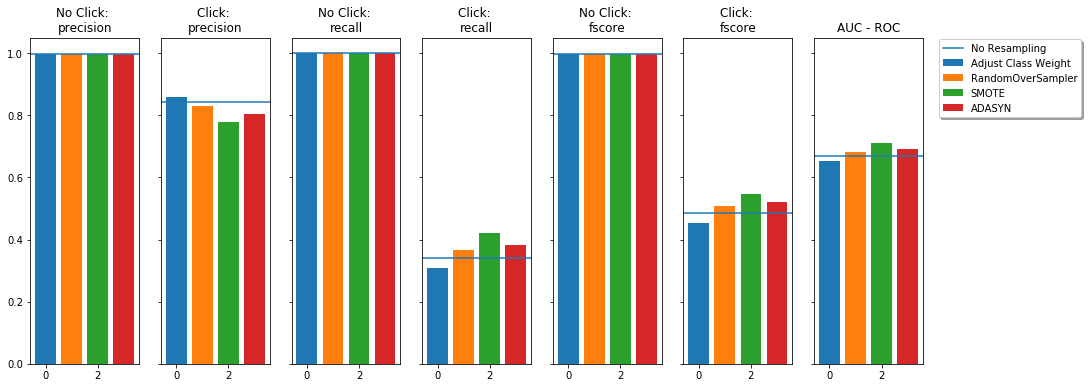

In [66]:
evaluate_method(resultsRF, 'oversample')

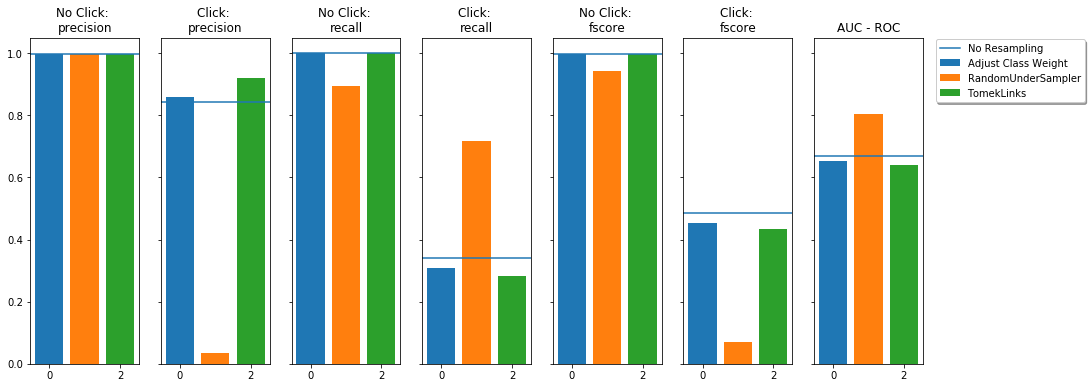

In [67]:
evaluate_method(resultsRF, 'undersample')

#### XGBoost

In [68]:
xgb_model = XGBClassifier(random_state=1)
cross_val_score(xgb_model, X, y, cv=5, scoring=f1)

array([0.54901961, 0.41935484, 0.4893617 , 0.55434783, 0.46067416])

In [176]:
# Using oversampling for handling imbalances in class label values
X_resampled, y_resampled = ADASYN().fit_sample(X_train, y_train)

params_XGBClf = {
 'learning_rate':0.1,
 'n_estimators' :120,
 'max_depth': 5,
 'min_child_weight': 3,
 'gamma': 0.2,
 'subsample': 0.8,
 'colsample_bytree': 0.8,
 'objective': 'binary:logistic',
 'scale_pos_weight':1,
 'random_state':1
}

xgb_clf = XGBClassifier(learning_rate=0.07, n_estimators=120, max_depth=3,min_child_weight=3,
                        gamma=0.2, subsample=0.8, colsample_bytree=0.8,
                        objective='binary:logistic', random_state=1)
xgb_clf.fit(X_resampled, y_resampled,eval_metric=f1)
preds_xgb = xgb_clf.predict(X_valid.as_matrix())

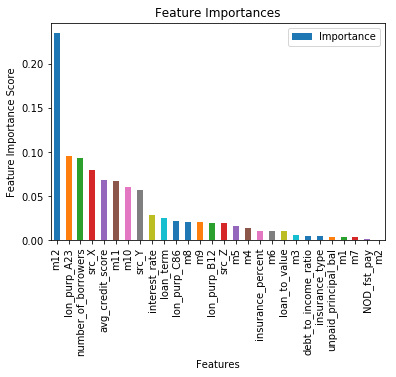

                Features  Importance
19                   m12    0.234991
25          lon_purp_A23    0.095435
4    number_of_borrowers    0.093365
22                 src_X    0.080038
21      avg_credit_score    0.068697
18                   m11    0.066985
17                   m10    0.060634
23                 src_Y    0.057483
0          interest_rate    0.028286
2              loan_term    0.025666
27          lon_purp_C86    0.021840
15                    m8    0.020587
16                    m9    0.020090
26          lon_purp_B12    0.019282
24                 src_Z    0.019194
12                    m5    0.015580
11                    m4    0.013535
6      insurance_percent    0.010594
13                    m6    0.010523
3          loan_to_value    0.010019
10                    m3    0.006277
5   debt_to_income_ratio    0.004676
7         insurance_type    0.004345
1   unpaid_principal_bal    0.003948
8                     m1    0.003470
14                    m7    0.003429
2

In [177]:
# Plot feature importance
feat_imp = xgb_clf.feature_importances_
feat = X_train.columns.tolist()
res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False)
res_df.plot('Features', 'Importance', kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()
print(res_df)
print(res_df["Features"].tolist())


In [178]:
evaluate(y_valid, preds_xgb)

Accuracy: 0.9962088574875064
F1 score:  0.6206896551724139
ROC_AUC:  0.7823084437493134


In [179]:
xgb_clf = XGBClassifier(learning_rate=0.07, n_estimators=120, max_depth=3,min_child_weight=3,
                        gamma=0.2, subsample=0.8, colsample_bytree=0.8, 
                        objective='binary:logistic', random_state=1)
cross_val_score(xgb_model, X_train, y_train, cv=5, scoring=f1)

array([0.38167939, 0.55319149, 0.54421769, 0.48529412, 0.40601504])

In [72]:
resultsXGB = model_resampling_pipeline(X_train.as_matrix(), X_valid.as_matrix(), y_train, y_valid, xgb_model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 86566), (1, 477)]
After resampling: [(0, 86566), (1, 86566)]
Technique: SMOTE
Before resampling: [(0, 86566), (1, 477)]
After resampling: [(0, 86566), (1, 86566)]
Technique: ADASYN
Before resampling: [(0, 86566), (1, 477)]
After resampling: [(0, 86566), (1, 86761)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 86566), (1, 477)]
After resampling: [(0, 477), (1, 477)]
Technique: TomekLinks
Before resampling: [(0, 86566), (1, 477)]
After resampling: [(0, 86351), (1, 477)]


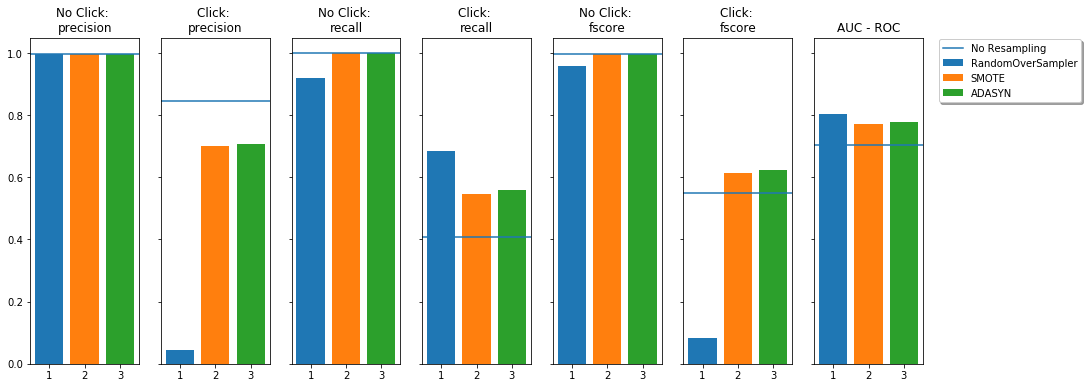

In [73]:
evaluate_method(resultsXGB, 'oversample')

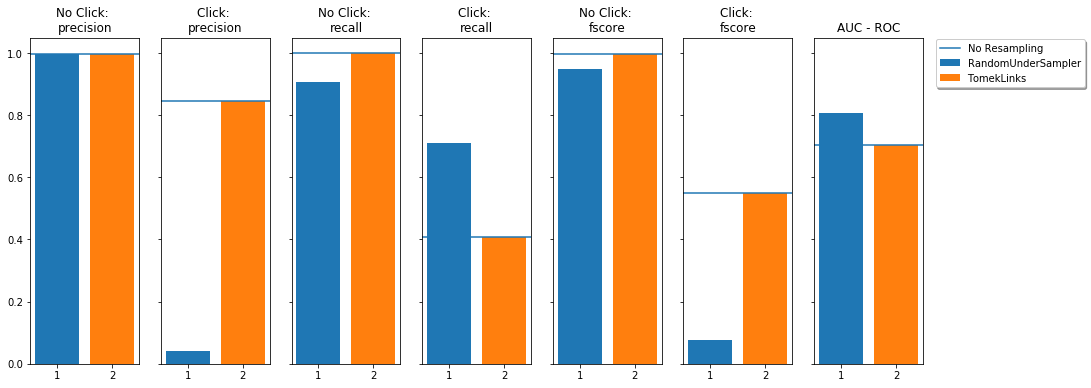

In [74]:
evaluate_method(resultsXGB, 'undersample')

#### AdaBoost

In [76]:
adaboost_model = AdaBoostClassifier(random_state=1)
cross_val_score(adaboost_model, X, y, cv=5, scoring=f1)

array([0.54      , 0.44680851, 0.47311828, 0.57446809, 0.46486486])

In [77]:
resultsADB = model_resampling_pipeline(X_train, X_valid, y_train, y_valid, adaboost_model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 86566), (1, 477)]
After resampling: [(0, 86566), (1, 86566)]
Technique: SMOTE
Before resampling: [(0, 86566), (1, 477)]
After resampling: [(0, 86566), (1, 86566)]
Technique: ADASYN
Before resampling: [(0, 86566), (1, 477)]
After resampling: [(0, 86566), (1, 86761)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 86566), (1, 477)]
After resampling: [(0, 477), (1, 477)]
Technique: TomekLinks
Before resampling: [(0, 86566), (1, 477)]
After resampling: [(0, 86351), (1, 477)]


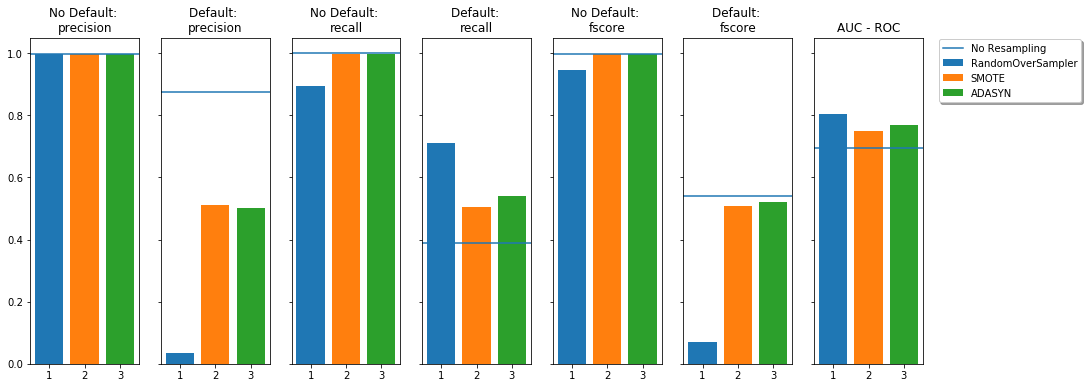

In [78]:
evaluate_method(resultsADB, 'oversample')

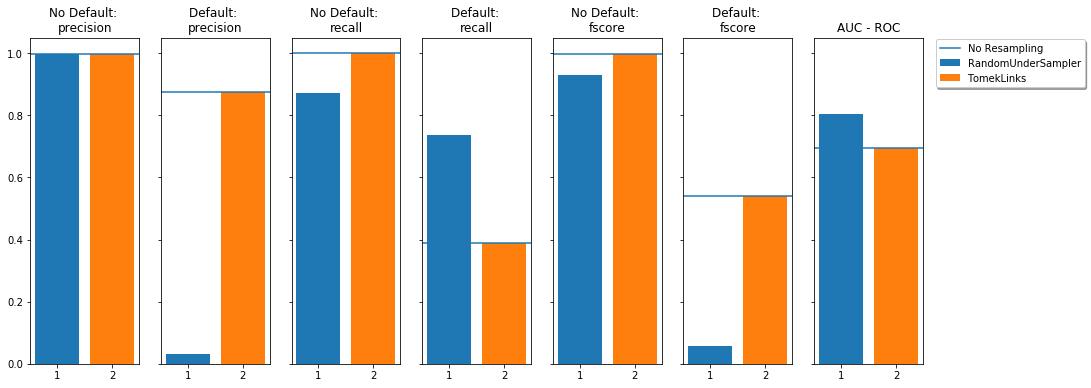

In [79]:
evaluate_method(resultsADB, 'undersample')

#### Tune hyper parameters - Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [ ]:
# default parameters = n_estimators='warn',max_depth=None,max_features='auto'
# we will optimise Random Forest 
rf_clf = RandomForestClassifier(class_weight={1: 0.004, 0: 0.996},random_state=1) # To do check for class_wieght params
# we can create hyperparameters as a list, as in type regularization penalty 
rf_param_grid = {"n_estimators": [50,100,120],
                 "max_features": [5,8,10]
                } 


In [ ]:
# we instantiate our model
rf_gridsearch = GridSearchCV(rf_clf,param_grid=rf_param_grid,scoring=f1,cv=5,verbose=0,n_jobs=-1,)

In [ ]:
# and fit it to the data 
rf_best_model = rf_gridsearch.fit(X_train, y_train)

In [ ]:
# from this, we can generate a set of predictions on our unseen features, X_test
rf_best_preds = rf_best_model.predict(X_valid)

In [ ]:
# and evaluate model performance 
evaluate(y_valid, rf_best_preds)

In [ ]:
# and we can call this method to return the best parameters the search returned
rf_best_model.best_estimator_

In [ ]:
test_preds = pd.Series(rf_best_model.predict(test_data),name='m13')
df_submission = pd.concat([Orig_test_data.loan_id, test_preds],axis=1)

In [ ]:
df_submission.to_csv('submission_rf1.csv',index=False)

####  Tune hyper parameters - XGBoost Classifier

In [80]:
# Default parameter values:(max_depth=3,learning_rate=0.1,n_estimators=100,n_jobs=1,objective='binary:logistic')
xgb_clf = xgb.XGBClassifier(random_state=1)
xgb_param_grid = { 
                    "n_estimators"  : [100,120,150],
                    "max_depth"    : [3,4],
                    "learning_rate" : [0.07,0.08],
                    "subsample"     : [0.7,0.8],
                    "colsample_bytree":[0.8],
                    "min_child_weight" : [3,4],
                    "gamma"           : [0.2],
                    "objective" : 'binary:logistic'
                  
                 }

In [81]:
xgb_gridsearch = GridSearchCV(xgb_clf, param_grid=xgb_param_grid, cv=5, verbose=0, n_jobs=-1,scoring=f1)

In [82]:
# Using oversampling for handling imbalances in class label values
X_resampled, y_resampled = ADASYN().fit_sample(X_train, y_train)

In [83]:
# and fit it to the data 
xgb_best_model = xgb_gridsearch.fit(X_resampled, y_resampled)

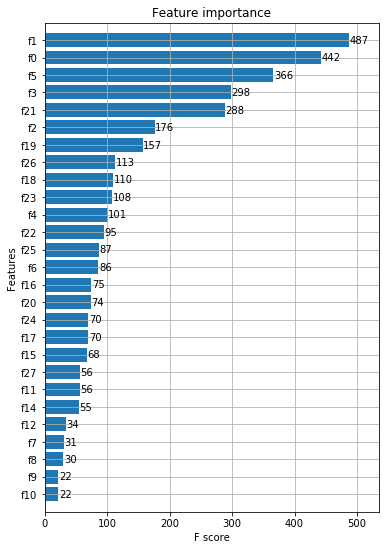

In [89]:
fig, ax = plt.subplots(figsize=(6,9))
xgb.plot_importance(xgb_best_model.best_estimator_,max_num_features=27, height=0.8,ax=ax)
plt.show()

In [86]:
# from this, we can generate a set of predictions on our unseen features, X_valid
xgb_best_preds = xgb_best_model.predict(X_valid.as_matrix())

In [87]:
# and evaluate model performance 
evaluate(y_valid, xgb_best_preds)

Accuracy: 0.9964845769429606
F1 score:  0.5714285714285715
ROC_AUC:  0.7136458763794369


In [88]:
# and we can call this method to return the best parameters the search returned
xgb_best_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=300, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=1, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.6, verbosity=1)

In [ ]:
test_preds = pd.Series(xgb_best_model.predict(test_data),name='m13')
df_submission = pd.concat([Orig_test_data.loan_id, test_preds],axis=1)

In [ ]:
df_submission.to_csv('submission_xgb1.csv',index=False)

### Final Submission

In [ ]:
test_preds = pd.Series(xgb_best_model.predict(test_data),name='m13')
df_submission = pd.concat([Orig_test_data.loan_id, test_preds],axis=1)

In [ ]:
df_submission.to_csv('submission_vt2.csv',index=False) 